# Analyse des résultats

In [12]:
import json
import pandas as pd
import pickle
import utils
import numpy as np
import seaborn as sns
import re
import wordcloud
import matplotlib.pyplot as plt
import json
import os
import gensim
import numpy as np
import utils
import pandas as pd
from sklearn.svm import LinearSVC, SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline,Pipeline
from textblob import TextBlob
import re
import collections
import folium as fl
import pickle
import sklearn.feature_extraction.text as skvec
from nltk.tokenize import word_tokenize

c:\users\babad\appdata\local\programs\python\python39\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


## Prédiction

In [15]:
#Importation des tweets et du modèle
tweets_df = pd.read_json('outputs/tweets_backup.json').transpose()

df_sts = pd.read_json('datasets/STS-Test/group5_sts_preprocessed.json', orient='records')
df_ss = pd.read_json('datasets/SS-Twitter/group5_ss_preprocessed.json', orient='records')
df_sem = pd.read_json('datasets/semeval/group5_semeval_preprocessed.json', orient='records')
df = pd.concat([df_sts, df_ss, df_sem], ignore_index=True)

#df = df.iloc[:100,:]
"""
index = utils.inverted_index(df)

# Initialisation des variable `X` et `y` :
def vect_trans(doc): return utils.tweet2vec(
    doc=doc, doclist=df['text'], index=index)

#Xtrain_TFIDF = np.array(list(map(vect_trans, list(df_train['text']))))
#Xtest_TFIDF = np.array(list(map(vect_trans, list(df_test['text']))))
#Ytrain_TFIDF, Ytest_TFIDF = list(df_train['labels']), list(df_test['labels'])

Xtrain = np.array(list(map(vect_trans, list(df['text']))))
Ytrain = df['labels']

# Grid-search
pipe_svc = Pipeline([('pca',PCA(n_components=750)),('clf',SVC())])
clf_SVC = GridSearchCV(
    estimator=pipe_svc,
    param_grid = [{'clf__C':[5,10,15,20],'clf__kernel':['poly','rbf']}]
)
clf_SVC.fit(Xtrain,Ytrain)
"""

"\nindex = utils.inverted_index(df)\n\n# Initialisation des variable `X` et `y` :\ndef vect_trans(doc): return utils.tweet2vec(\n    doc=doc, doclist=df['text'], index=index)\n\n#Xtrain_TFIDF = np.array(list(map(vect_trans, list(df_train['text']))))\n#Xtest_TFIDF = np.array(list(map(vect_trans, list(df_test['text']))))\n#Ytrain_TFIDF, Ytest_TFIDF = list(df_train['labels']), list(df_test['labels'])\n\nXtrain = np.array(list(map(vect_trans, list(df['text']))))\nYtrain = df['labels']\n\n# Grid-search\npipe_svc = Pipeline([('pca',PCA(n_components=750)),('clf',SVC())])\nclf_SVC = GridSearchCV(\n    estimator=pipe_svc,\n    param_grid = [{'clf__C':[5,10,15,20],'clf__kernel':['poly','rbf']}]\n)\nclf_SVC.fit(Xtrain,Ytrain)\n"

In [16]:
def vect_trans(doc): return utils.tweet2vec(
    doc=doc, doclist=df['text'], index=index)


index = utils.inverted_index(df)
X_TFIDF = np.array(list(map(vect_trans, list(df['text']))))
Y_TFIDF = list(df['labels'])
print('Representation DONE !')

pipe_svc = Pipeline([('pca',PCA(n_components=750)),('clf',SVC(kernel='rbf',C=10))])
pipe_svc.fit(X_TFIDF,Y_TFIDF)

Representation DONE !


Pipeline(steps=[('pca', PCA(n_components=750)), ('clf', SVC(C=10))])

In [17]:
#Traitement des textes des tweets
texts = tweets_df['text']
texts_pp = []
for t in texts:
    texts_pp.append(utils.preprocess_tweet(t))
tweets_df['text']=texts_pp
    

In [19]:
#Calcul de la prédiction
X = np.array(list(map(vect_trans, list(tweets_df['text']))))
Y = pipe_svc.predict(X)
tweets_df['labels'] = Y

## Analyse

In [37]:
with open('inputs/countries.txt','r') as f:
    countries_list = f.read().split(',')
with open('inputs/countries2.txt','r') as f:
    countries_list_2 = f.read().split(',')
with open('inputs/hashtags.txt','r') as f:
    hashtags_list = f.read().split(',')
with open('inputs/keywords.txt','r') as f:
    keywords_list = f.read().split(',')
query_kws = set(countries_list+countries_list_2+hashtags_list+keywords_list)

def country(query):
    return ' '.join(str(query).split(' ')[:-1])
def query_term(query):
    return str(query).split(' ')[-1]

countries = list(map(country,list(tweets_df['query'])))
tweets_df['country']=countries

In [24]:
print('Nombre de tweets : ',len(X))

Nombre de tweets :  8865


**WordCloud**

En général

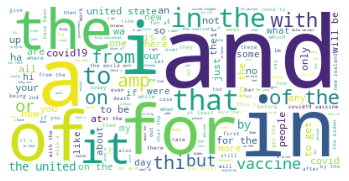

In [25]:
wc = wordcloud.WordCloud(stopwords=query_kws,background_color='white').generate(' '.join(tweets_df['text']))
plt.imshow(wc)
plt.axis('off')
plt.show()

Tweets 'positifs'

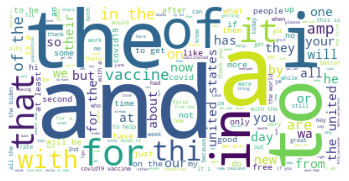

In [26]:
wc = wordcloud.WordCloud(stopwords=query_kws,background_color='white').generate(' '.join(tweets_df[tweets_df['labels']==1]['text']))
plt.imshow(wc)
plt.axis('off')
plt.show()

Tweets 'négatifs'

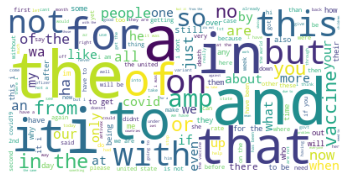

In [27]:
wc = wordcloud.WordCloud(stopwords=query_kws,background_color='white').generate(' '.join(tweets_df[tweets_df['labels']==-1]['text']))
plt.imshow(wc)
plt.axis('off')
plt.show()

**Nombre de réponse par pays**

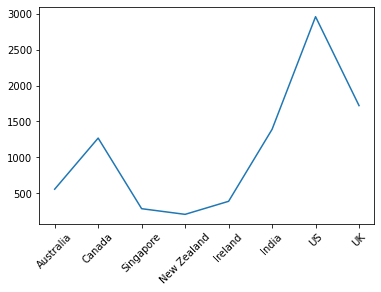

In [128]:
countries_total = {'Australia': 555,
 'Canada': 1268,
 'Singapore': 283,
 'New Zealand': 204,
 'Ireland': 386,
 'India': 1390,
 'US': 2962,
 'UK': 1721}

fig, ax = plt.subplots()
plt.plot(range(len(countries_total)),countries_total.values())
ax.set_xticks(range(len(countries_total)))
ax.set_xticklabels(list(countries_total.keys()),rotation=45)
plt.show()

### Niveaux de satisfaction

**Satisfaction *générale***

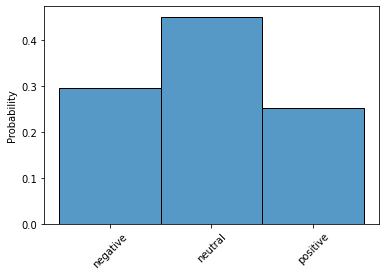

In [20]:
fig,ax =plt.subplots()
ax.set_xticks([-1,0,1])
ax.set_xticklabels(['negative','neutral','positive'],rotation=45)
sns.histplot(Y,discrete=True,stat="probability",ax=ax)
plt.show()

**Satisfaction UK**

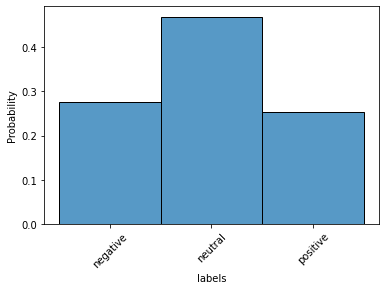

In [45]:
fig,ax =plt.subplots()
ax.set_xticks([-1,0,1])
ax.set_xticklabels(['negative','neutral','positive'],rotation=45)
sns.histplot(pd.concat([tweets_df[tweets_df['country'] == 'UK']['labels'],tweets_df[tweets_df['country'] == 'United Kingdom']['labels']]),discrete=True,stat="probability",ax=ax)
plt.show()

**Satisfaction US**

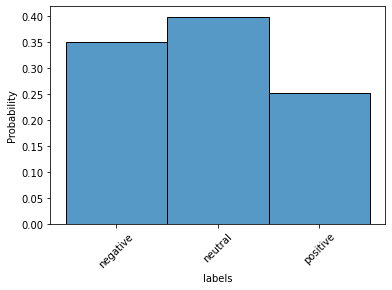

In [46]:
fig,ax =plt.subplots()
ax.set_xticks([-1,0,1])
ax.set_xticklabels(['negative','neutral','positive'],rotation=45)
sns.histplot(pd.concat([tweets_df[tweets_df['country'] == 'US']['labels'],tweets_df[tweets_df['country'] == 'United States']['labels']]),discrete=True,stat="probability",ax=ax)
plt.show()

**Satisfaction Inde**

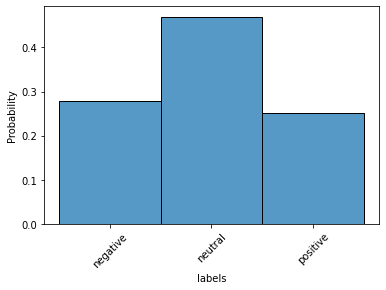

In [47]:
fig,ax =plt.subplots()
ax.set_xticks([-1,0,1])
ax.set_xticklabels(['negative','neutral','positive'],rotation=45)
sns.histplot(tweets_df[tweets_df['country'] == 'India']['labels'],discrete=True,stat="probability",ax=ax)
plt.show()

**Satisfaction Canada**

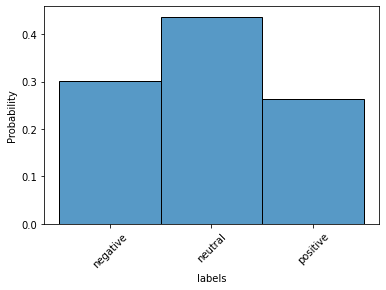

In [48]:
fig,ax =plt.subplots()
ax.set_xticks([-1,0,1])
ax.set_xticklabels(['negative','neutral','positive'],rotation=45)
sns.histplot(tweets_df[tweets_df['country'] == 'Canada']['labels'],discrete=True,stat="probability",ax=ax)
plt.show()

**Satisfaction Australie**

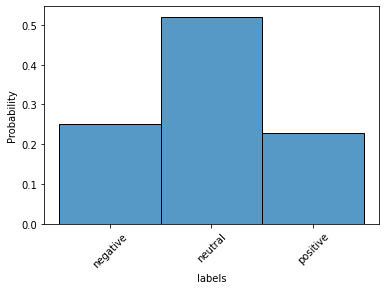

In [49]:
fig,ax =plt.subplots()
ax.set_xticks([-1,0,1])
ax.set_xticklabels(['negative','neutral','positive'],rotation=45)
sns.histplot(tweets_df[tweets_df['country'] == 'Australia']['labels'],discrete=True,stat="probability",ax=ax)
plt.show()

## Carte

In [52]:
import folium as fo
import webbrowser
import json

def extract_from_json(path="outputs", filename="tweets_backup.json"):
    """
    Exporte vers un dictionnaire les données contenues dans le fichier json spécifié.
    :param path: Path for the json file
    :type path: Str
    :param filename: The name of the json file
    :type filename: Str

    :return: The dictionnary containing the data of the json file
    :rtype: Dict
    """
    with open(path+"/"+filename, "r") as f:
        my_dictionnary = json.load(f)
    return my_dictionnary

name_dict = extract_from_json(path="outputs",filename="map.json")


def create_map():
    m = fo.Map(location = [48.8534 , 2.3488], zoom_start = 2)
    for key,value in name_dict.items() :
        fo.Marker([value["locationx"],value["locationy"]], popup=fo.Popup(key+"<br>Antivax popularity : {:.2f} %<br>Covid19 vax popularity : {:.2f} %".format(value["antivax positivity"],value["vaccine positivity"]),max_width=200), tooltip=key).add_to(m)
    m.save("map.html")
    webbrowser.open("map.html")

create_map()

name_list = ['Australia','Canada','India','Ireland','New Zealand','Singapore']
name_list2 = ['United Kingdom','UK']
name_list3 = ['United States','US']


def analyze_all_sentiments():
    for name in name_list :
        positif=0
        neutre=0
        negatif=0
        AVpositif = 0
        AVneutre = 0
        AVnegatif = 0
        for i in tweets_df.index:
            try :
                if name in tweets_df["query"][i] :
                    x=tweets_df["labels"][i]
                    if x == 1:
                        positif+=1
                    if x == 0:
                        neutre+=1
                    if x == -1:
                        negatif+=1
                    if "vax" in tweets_df["query"][i] :
                        if x == 1:
                            AVpositif+=1
                        if x == 0:
                            AVneutre+=1
                        if x == -1:
                            AVnegatif+=1
            except :
                pass
        data_map = extract_from_json(filename="map.json")
        if positif+negatif+neutre != 0 :
            data_map[name]["vaccine positivity"] = positif * 100 / (positif+negatif+neutre)
        if AVpositif + AVnegatif + AVneutre != 0 :
            data_map[name]["antivax positivity"] = AVpositif * 100 / (AVpositif + AVnegatif + AVneutre)
        save_to_json(data_map,filename="map.json")


    positif=0
    neutre=0
    negatif=0
    AVpositif = 0
    AVneutre = 0
    AVnegatif = 0
    for name in name_list2 :
        for id in data:
            try :
                if name in tweets_df["query"][i] :
                    x=tweets_df["labels"][i]
                    if x == 1:
                        positif+=1
                    if x == 0:
                        neutre+=1
                    if x == -1:
                        negatif+=1
                    if "vax" in tweets_df["query"][i] :
                        if x == 1:
                            AVpositif+=1
                        if x == 0:
                            AVneutre+=1
                        if x == -1:
                            AVnegatif+=1
            except :
                pass
    data_map = extract_from_json(filename="map.json")
    if positif+negatif+neutre != 0 :
        data_map["UK"]["vaccine positivity"] = positif * 100 / (positif+negatif+neutre)
    if AVpositif + AVnegatif + AVneutre != 0 :
        data_map["UK"]["antivax positivity"] = AVpositif * 100 / (AVpositif + AVnegatif + AVneutre)
    save_to_json(data_map,filename="map.json")


    positif=0
    neutre=0
    negatif=0
    AVpositif = 0
    AVneutre = 0
    AVnegatif = 0
    for name in name_list3 :
        for id in data:
            try :
                if name in tweets_df["query"][i] :
                    x=tweets_df["labels"][i]
                    if x == 1:
                        positif+=1
                    if x == 0:
                        neutre+=1
                    if x == -1:
                        negatif+=1
                    if "vax" in tweets_df["query"][i] :
                        if x == 1:
                            AVpositif+=1
                        if x == 0:
                            AVneutre+=1
                        if x == -1:
                            AVnegatif+=1
            except :
                pass
    data_map = extract_from_json(filename="map.json")
    if positif+negatif+neutre != 0 :
        data_map["US"]["vaccine positivity"] = positif * 100 / (positif+negatif+neutre)
    if AVpositif + AVnegatif + AVneutre != 0 :
        data_map["US"]["antivax positivity"] = AVpositif * 100 / (AVpositif + AVnegatif + AVneutre)
    save_to_json(data_map,filename="map.json")


analyze_all_sentiments()



NameError: name 'save_to_json' is not defined